# Capstone assignment 2 - Segmenting and Clustering Neighborhoods in Toronto

## Introduction

In this assignment, you will be required to explore, segment, and cluster the neighborhoods in the city of Toronto. The Toronto neighborhood data is scraped from a Wikipedia page. The data was structured into pandas dataframe and analysized to explore the segmentation and clustering.

The Foursquare API was used to search for a specific type of venues, particular venue, Foursquare user, geographical location, and trending venues around a location. Also used the visualization library, Folium, to visualize the results.

### Import necessary Libraries

In [1]:
import requests
import lxml.html as lh
import pandas as pd

In [2]:
# Assign url to the Wikipedia page
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')


In [3]:
#Check the length of the first 5 rows
[len(T) for T in tr_elements[:5]]

[3, 3, 3, 3, 3]

In [4]:
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
#print '%d:"%s"'%(i,name)
#    print '%d:"%s"'%(i,name)
    col.append((name,[]))

#print (tr_elements[:5])
len(tr_elements)

294

In [5]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
#If row is not of size 3 as this table has 3 columns, the //tr data is not from our table 
    if len(T)!=3:
        break
    
#i is the index of our column
    i=0
    
#Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [6]:
[len(C) for (title,C) in col]

[288, 288, 288]

In [7]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [8]:
# Write dataframe to a file
df.to_csv('List_of_postal_codes_of_Canada 1.csv',header=1,index=False)
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned\n
1,M2A,Not assigned,Not assigned\n
2,M3A,North York,Parkwoods\n
3,M4A,North York,Victoria Village\n
4,M5A,Downtown Toronto,Harbourfront\n


In [9]:
df.shape

(288, 3)

In [10]:
df.columns = df.columns.str.strip()  # To remove Key Error

In [11]:
df['Neighbourhood'] = df.Neighbourhood.str.replace('\n','') #To remove "\n" stream at the end of Neighbourhood 

In [12]:
df.drop(df.loc[df['Borough']=="Not assigned"].index, inplace=True) # To drop off rows when Borough value is not assigned.

In [13]:
df.head(10)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


In [14]:
df.shape  # Much reduced number of rows after elimination of rows with "Not assigned" value for Borough

(211, 3)

In [15]:
df.to_csv('List_of_postal_codes_of_Canada 2.csv',header=1,index=False)  #To output a csv file for the dataframe

In [16]:
# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
# As shown on row #8 below 
df['Neighbourhood'] = df['Neighbourhood'].replace("Not assigned",df['Borough']) 

In [17]:
df.head(10)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Queen's Park
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


In [18]:
# More than one neighborhood can exist in one postal code area. 
# Such rows will be combined into one row with the neighborhoods separated with a comma.
df_group=df.groupby(['Postcode','Borough'],as_index=False)['Neighbourhood'].agg(','.join)

In [19]:
df_group.head(15)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [20]:
df_group.shape  # The total number of rows after combining Neighborhood with the same postcode.

(103, 3)

In [21]:
df.columns = df.columns.str.strip()

In [22]:
df_group.to_csv('List_of_postal_codes_of_Canada - grouped.csv',header=1,index=False)

In [23]:
df_coordinate=pd.read_csv('Geospatial_Coordinates.csv')  # Load up Geospatial coordination file provided by instructor.

In [24]:
df_coordinate.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [25]:
#Rename column for postal code to make the same column name
df_coordinate.rename(columns={'Postal Code': 'Postcode'}, inplace=True)

In [26]:
df_coordinate.shape  # Double checked two files to have the same number of rows.

(103, 3)

In [27]:
# Merge two table based on the same Postcode, to append the coofinates for each postcode
df_combine = df_group.merge(df_coordinate,on='Postcode')

In [28]:
df_combine.shape # The resulting combined table has the same number of row or 103 as before the merge.

(103, 5)

# Below is answer #2 for Capstone Week 3 project

In [29]:
df_combine.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


In [30]:
# Output the combined data file in CSV format

df_combine.to_csv('List_of_postal_codes_of_Canada - combine.csv',header=1,index=False) 

## Segmenting and Clustering Neighborhoods in Canada

### Import libraries

In [31]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Load and explore the data

In [32]:
# Create a new dataframe as df_toronto for clustering analysis late
df_toronto=df_combine
df_toronto.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### Create a map of Toronto with neighborhoods superimposed on top.

In [33]:
#Test code using New York sample code, matching the datafrom name with New York sample code in the class lab

In [34]:
df_neighborhoods=df_toronto

In [35]:
df_neighborhoods.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [36]:
#Rename column for Neighbourhood to match the column name Neighborhoods in New York sample
df_neighborhoods.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)
df_toronto.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)

In [37]:
df_neighborhoods.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### Use geopy library to get the latitude and longitude values of Toronto City.
In order to define an instance of the geocoder, we need to define a user_agent, named as toronto_explorer.

In [38]:
address = 'Toronto City, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.7189883, -79.44157.


##Create a map of New York with neighborhoods superimposed on top.

In [39]:
# create map of Toronto using latitude and longitude values
# map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

In [40]:
# map_toronto

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

##Define Foursquare Credentials and Version

In [41]:
CLIENT_ID = '0D33T0AVFXWBBXCZDHJ2IA32T5GG5IK1J5GYXBAIP14Z4KRF' # your Foursquare ID
CLIENT_SECRET = '0L2NKXGCDXVV3HLBJDOJDSNIOPCOODUIZOQQECZ4DC5F2ZIQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0D33T0AVFXWBBXCZDHJ2IA32T5GG5IK1J5GYXBAIP14Z4KRF
CLIENT_SECRET:0L2NKXGCDXVV3HLBJDOJDSNIOPCOODUIZOQQECZ4DC5F2ZIQ


##Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [42]:
df_toronto.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [43]:
df_toronto.loc[0,"Neighborhood"]

'Rouge,Malvern'

In [44]:
# Below is a test of non-related program

In [45]:
df_toronto.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [46]:
df_toronto.to_json("df_toronto.json")

In [47]:
df_testfile = pd.read_json('df_toronto.json')
df_testfile.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
10,M1P,Scarborough,"Dorset Park,Scarborough Town Centre,Wexford He...",43.757410,-79.273304
100,M9R,Etobicoke,"Kingsview Village,Martin Grove Gardens,Richvie...",43.688905,-79.554724
101,M9V,Etobicoke,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",43.739416,-79.588437


In [48]:
# Above is a test to a non-related program

Get the neighborhood's latitude and longitude values.

In [49]:
neighborhood_latitude = df_toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_toronto.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rouge,Malvern are 43.806686299999996, -79.19435340000001.


##Now, let's get the top 100 venues that are in a neighborhood within a radius of 500 meters.

First, let's create the GET request URL. Name your URL url.

Now, let's assume that it is lunch time, and you are craving Italian food. So, let's define a query to search for Italian food that is within 500 metres from the Rouge neighborhood.

In [50]:
search_query = 'Italian'
radius = 500
LIMIT = 30
print(search_query + ' .... OK!')

Italian .... OK!


Define the corresponding URL

In [51]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=0D33T0AVFXWBBXCZDHJ2IA32T5GG5IK1J5GYXBAIP14Z4KRF&client_secret=0L2NKXGCDXVV3HLBJDOJDSNIOPCOODUIZOQQECZ4DC5F2ZIQ&ll=43.7189883,-79.44157&v=20180605&query=Italian&radius=500&limit=30'

Send the GET Request and examine the results

In [52]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d2a0f04071902002578324b'},
 'response': {'venues': []}}

From the Foursquare lab in the previous lab, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.

In [53]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#Explore Neighborhoods in Toronto

###Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [54]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [55]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

Rouge,Malvern
Highland Creek,Rouge Hill,Port Union
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park,Ionview,Kennedy Park
Clairlea,Golden Mile,Oakridge
Cliffcrest,Cliffside,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Scarborough Town Centre,Wexford Heights
Maryvale,Wexford
Agincourt
Clarks Corners,Sullivan,Tam O'Shanter
Agincourt North,L'Amoreaux East,Milliken,Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
Silver Hills,York Mills
Newtonbrook,Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park,Don Mills South
Bathurst Manor,Downsview North,Wilson Heights
Northwood Park,York University
CFB Toronto,Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens,Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West,Riverdale
The Beaches West,Indi

In [56]:
df_toronto.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


###Let's check the size of the resulting dataframe

In [57]:
print(toronto_venues.shape)
toronto_venues.head()

(1339, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge,Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,RIGHT WAY TO GOLF,43.785177,-79.161108,Golf Course
2,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
4,"Guildwood,Morningside,West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


###Let's check how many venues were returned for each neighborhood

In [58]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",30,30,30,30,30,30
Agincourt,4,4,4,4,4,4
"Agincourt North,L'Amoreaux East,Milliken,Steeles East",2,2,2,2,2,2
"Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown",11,11,11,11,11,11
"Alderwood,Long Branch",8,8,8,8,8,8
"Bathurst Manor,Downsview North,Wilson Heights",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park,Lawrence Manor East",22,22,22,22,22,22
Berczy Park,30,30,30,30,30,30


#### Let's find out how many unique categories can be curated from all the returned venues

In [59]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 239 uniques categories.


## 3. Analyze Each Neighborhood

In [60]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

In [61]:
toronto_onehot.head()

,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Drugstore,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Social Club,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [62]:
# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Drugstore,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Social Club,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Rouge,Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

###And let's examine the new dataframe size.

In [63]:
toronto_onehot.shape

(1339, 239)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [64]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Drugstore,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Social Club,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,"Adelaide,King,Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.00,0.000000,0

In [65]:
#### Let's confirm the new size

In [66]:
toronto_grouped.shape

(99, 239)

In [67]:
# The above toronto_onehot and toronto_grouped seem not correct, not try to use them.

###Let's print each neighborhood along with the top 5 most common venues

In [68]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
#    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#    print('\n')

----Adelaide,King,Richmond----
----Agincourt----
----Agincourt North,L'Amoreaux East,Milliken,Steeles East----
----Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown----
----Alderwood,Long Branch----
----Bathurst Manor,Downsview North,Wilson Heights----
----Bayview Village----
----Bedford Park,Lawrence Manor East----
----Berczy Park----
----Birch Cliff,Cliffside West----
----Bloordale Gardens,Eringate,Markland Wood,Old Burnhamthorpe----
----Brockton,Exhibition Place,Parkdale Village----
----Business Reply Mail Processing Centre 969 Eastern----
----CFB Toronto,Downsview East----
----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
----Cabbagetown,St. James Town----
----Caledonia-Fairbanks----
----Canada Post Gateway Processing Centre----
----Cedarbrae----
----Central Bay Street----
----Chinatown,Grange Park,Kensington Market----
----Christie----
----Church and Wellesley----
----Cl

#### Let's put that into a *pandas* dataframe

####First, let's write a function to sort the venues in descending order.

In [69]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [70]:
####Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [71]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Steakhouse,Coffee Shop,Café,Asian Restaurant,Pizza Place,Hotel,Concert Hall,Monument / Landmark,Sushi Restaurant,Lounge
1,Agincourt,Clothing Store,Lounge,Skating Rink,Breakfast Spot,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run,Discount Store
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",Park,Playground,Curling Ice,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run,Discount Store,Diner
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Grocery Store,Pizza Place,Coffee Shop,Video Store,Beer Store,Pharmacy,Fried Chicken Joint,Fast Food Restaurant,Sandwich Place,Dim Sum Restaurant
4,"Alderwood,Long Branch",Pizza Place,Gym,Coffee Shop,Skating Rink,Pub,Pharmacy,Sandwich Place,Women's Store,Dim Sum Restaurant,Deli / Bodega


# Cluster Neighborhoods

###Run k-means to cluster the neighborhood into 5 clusters.

In [72]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 3, 4, 4, 2, 0, 2, 2, 0], dtype=int32)

### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [73]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353,1.0,Fast Food Restaurant,Women's Store,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run,Discount Store
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,0.0,Golf Course,Bar,Women's Store,Dance Studio,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,0.0,Electronics Store,Rental Car Location,Medical Center,Pizza Place,Breakfast Spot,Mexican Restaurant,Intersection,Women's Store,Drugstore,Dog Run
3,M1G,Scarborough,Woburn,43.770992,-79.216917,2.0,Coffee Shop,Korean Restaurant,Insurance Office,Deli / Bodega,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,Caribbean Restaurant,Bank,Athletics & Sports,Bakery,Thai Restaurant,Fried Chicken Joint,Hakka Restaurant,Eastern European Restaurant,Drugstore,Dog Run


# Below is answer #3 for Capstone Week 3 assignment

### Finally, let's visualize the resulting clusters

In [86]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

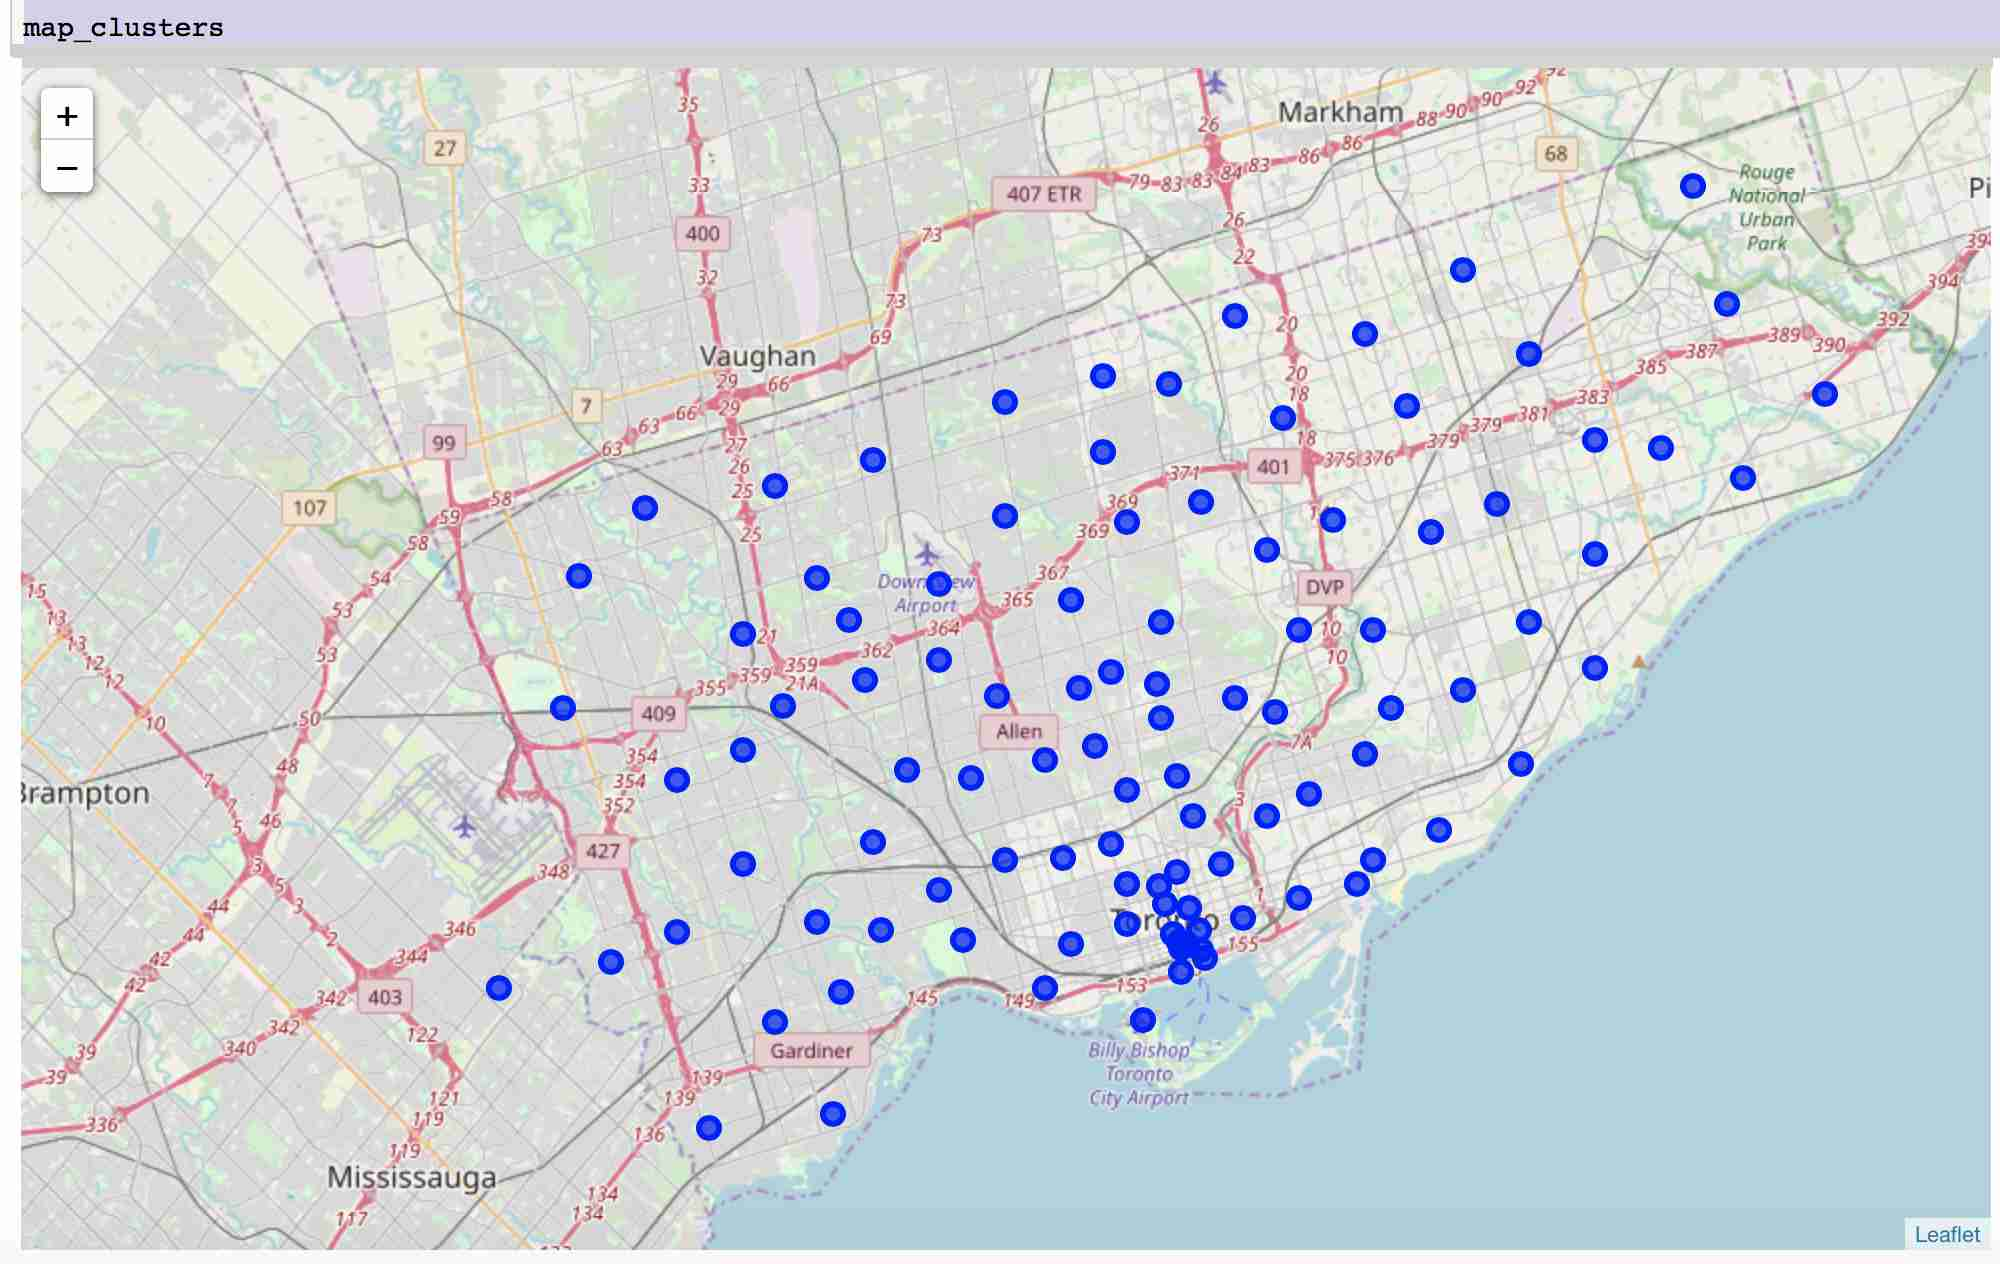

In [88]:
from IPython.display import Image  # Due to problem to load up map into Watson Studio, display Toronto map cluster
Image(filename='Toronto_clustering_map_for_Capstone_Week_3_assignment.jpg')

#Examine Clusters

###Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. 
###Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

In [75]:
## Cluster 1

In [76]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,0.0,Golf Course,Bar,Women's Store,Dance Studio,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run
2,Scarborough,0.0,Electronics Store,Rental Car Location,Medical Center,Pizza Place,Breakfast Spot,Mexican Restaurant,Intersection,Women's Store,Drugstore,Dog Run
4,Scarborough,0.0,Caribbean Restaurant,Bank,Athletics & Sports,Bakery,Thai Restaurant,Fried Chicken Joint,Hakka Restaurant,Eastern European Restaurant,Drugstore,Dog Run
7,Scarborough,0.0,Bus Line,Bakery,Park,Intersection,Metro Station,Fast Food Restaurant,Soccer Field,Gay Bar,Curling Ice,Drugstore
8,Scarborough,0.0,American Restaurant,Movie Theater,Motel,Women's Store,Dance Studio,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run
9,Scarborough,0.0,Skating Rink,College Stadium,General Entertainment,Café,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run
10,Scarborough,0.0,Indian Restaurant,Vietnamese Restaurant,Chinese Restaurant,Pet Store,Light Rail Station,Latin American Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Curling Ice
11,Scarborough,0.0,Auto Garage,Middle Eastern Restaurant,Sandwich Place,Breakfast Spot,Bakery,Smoke Shop,Concert Hall,Construction & Landscaping,Empanada Restaurant,Electronics Store
13,Scarborough,0.0,Pizza Place,Shopping Mall,Pharmacy,Bank,Italian Restaurant,Thai Restaurant,Fried Chicken Joint,Fast Food Restaurant,Chinese Restaurant,Noodle House
17,North York,0.0,Golf Course,Fast Food Restaurant,Dog Run,Mediterranean Restaurant,Pool,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Drugstore


In [77]:
## Cluster 2

In [78]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,1.0,Fast Food Restaurant,Women's Store,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run,Discount Store


In [79]:
## Cluster 3

In [80]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Scarborough,2.0,Coffee Shop,Korean Restaurant,Insurance Office,Deli / Bodega,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run
6,Scarborough,2.0,Discount Store,Coffee Shop,Hobby Shop,Department Store,Convenience Store,Bus Station,Comic Shop,Concert Hall,Empanada Restaurant,Electronics Store
12,Scarborough,2.0,Clothing Store,Lounge,Skating Rink,Breakfast Spot,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run,Discount Store
15,Scarborough,2.0,Chinese Restaurant,Fast Food Restaurant,Grocery Store,Japanese Restaurant,Noodle House,Nail Salon,Pharmacy,Pizza Place,Camera Store,Bubble Tea Shop
18,North York,2.0,Clothing Store,Coffee Shop,Department Store,Burger Joint,Bank,Bakery,Smoothie Shop,Japanese Restaurant,Food Court,Pharmacy
22,North York,2.0,Ramen Restaurant,Coffee Shop,Sandwich Place,Café,Pet Store,Arts & Crafts Store,Ice Cream Shop,Fast Food Restaurant,Steakhouse,Bubble Tea Shop
27,North York,2.0,Coffee Shop,Asian Restaurant,Gym,Beer Store,Clothing Store,Chinese Restaurant,Dim Sum Restaurant,Restaurant,Discount Store,Sandwich Place
28,North York,2.0,Coffee Shop,Gift Shop,Pharmacy,Shopping Mall,Diner,Restaurant,Deli / Bodega,Bridal Shop,Fast Food Restaurant,Bank
29,North York,2.0,Falafel Restaurant,Massage Studio,Miscellaneous Shop,Furniture / Home Store,Bar,Caribbean Restaurant,Coffee Shop,Drugstore,Dog Run,Deli / Bodega
33,North York,2.0,Grocery Store,Athletics & Sports,Liquor Store,Coffee Shop,Event Space,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run


In [81]:
## Cluster 4

In [82]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Scarborough,3.0,Park,Playground,Curling Ice,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run,Discount Store,Diner
23,North York,3.0,Park,Bank,Convenience Store,Dance Studio,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run
25,North York,3.0,Park,Fast Food Restaurant,Food & Drink Shop,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run,Discount Store
30,North York,3.0,Park,Airport,Curling Ice,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run,Discount Store
31,North York,3.0,Park,Bank,Shopping Mall,Grocery Store,Airport Food Court,Dance Studio,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant
44,Central Toronto,3.0,Park,Swim School,Bus Line,College Arts Building,College Gym,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run
50,Downtown Toronto,3.0,Park,Playground,Trail,Building,Curling Ice,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run,Discount Store
74,York,3.0,Park,Pharmacy,Fast Food Restaurant,Market,Women's Store,Airport Gate,Event Space,Empanada Restaurant,Electronics Store,Eastern European Restaurant
90,Etobicoke,3.0,Park,Pool,River,Cuban Restaurant,Eastern European Restaurant,Drugstore,Dog Run,Discount Store,Diner,Dim Sum Restaurant
98,York,3.0,Park,Convenience Store,Dance Studio,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run,Discount Store


In [83]:
## Cluster 5

In [84]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,4.0,Pizza Place,Playground,Convenience Store,Women's Store,Curling Ice,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run,Discount Store
24,North York,4.0,Grocery Store,Discount Store,Pharmacy,Pizza Place,Butcher,Coffee Shop,Gift Shop,Coworking Space,Dog Run,Gluten-free Restaurant
40,East York,4.0,Park,Coffee Shop,Pizza Place,Convenience Store,Dance Studio,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run
81,York,4.0,Grocery Store,Bus Line,Pizza Place,Brewery,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run,Discount Store,Diner
89,Etobicoke,4.0,Pizza Place,Gym,Coffee Shop,Skating Rink,Pub,Pharmacy,Sandwich Place,Women's Store,Dim Sum Restaurant,Deli / Bodega
96,North York,4.0,Empanada Restaurant,Pizza Place,Women's Store,Curling Ice,Electronics Store,Eastern European Restaurant,Drugstore,Dog Run,Discount Store,Diner
99,Etobicoke,4.0,Pizza Place,Coffee Shop,Chinese Restaurant,Sandwich Place,Middle Eastern Restaurant,Curling Ice,Eastern European Restaurant,Drugstore,Dog Run,Discount Store
100,Etobicoke,4.0,Park,Bus Line,Pizza Place,Mobile Phone Shop,Eastern European Restaurant,Drugstore,Dog Run,Discount Store,Diner,Dim Sum Restaurant
101,Etobicoke,4.0,Grocery Store,Pizza Place,Coffee Shop,Video Store,Beer Store,Pharmacy,Fried Chicken Joint,Fast Food Restaurant,Sandwich Place,Dim Sum Restaurant


In [85]:
# Based on above Clustering data, the optimal clustering level could be 3.